In [ ]:
!pip install tqdm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import time
import numpy as np
from datetime import datetime  
class ModelTrainer:
    def __init__(self, model_name):
        self.model_name = model_name
        self.training_times = []
        self.metrics = {
            'mae': [],
            'mse': [],
            'rmse': [],
            'r2': []
        }
        self.feature_importance = None
        self.predictions = None

    def train_and_evaluate(self, model, X_train, X_test, y_train, y_test):
        
        print(f"[{datetime.now().strftime('%H:%M:%S')}] Starting training for {self.model_name}...")

        # Record training time
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        self.training_times.append(training_time)

        
        print(f"[{datetime.now().strftime('%H:%M:%S')}] Training completed for {self.model_name} in {training_time:.2f} seconds.")

        
        print(f"[{datetime.now().strftime('%H:%M:%S')}] Making predictions for {self.model_name}...")
        self.predictions = model.predict(X_test)

        
        print(f"[{datetime.now().strftime('%H:%M:%S')}] Calculating metrics for {self.model_name}...")
        self.metrics['mae'].append(mean_absolute_error(y_test, self.predictions))
        self.metrics['mse'].append(mean_squared_error(y_test, self.predictions))
        self.metrics['rmse'].append(np.sqrt(mean_squared_error(y_test, self.predictions)))
        self.metrics['r2'].append(r2_score(y_test, self.predictions))

        
        if hasattr(model, 'feature_importances_'):
            self.feature_importance = model.feature_importances_
            print(f"[{datetime.now().strftime('%H:%M:%S')}] Feature importance calculated for {self.model_name}.")

        return self.metrics, self.predictions

    def plot_feature_importance(self, feature_names=None):
        if self.feature_importance is not None:
            if feature_names is None:
                
                feature_names = [f'Feature {i}' for i in range(len(self.feature_importance))]

            plt.figure(figsize=(10, 6))
            importances = pd.Series(self.feature_importance, index=feature_names)
            importances.sort_values().plot(kind='barh')
            plt.title(f'Importância das Features - {self.model_name}')
            plt.show()

    def plot_predictions_vs_actual(self, y_test):
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, self.predictions, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Valores Reais')
        plt.ylabel('Previsões')
        plt.title(f'Previsões vs Valores Reais - {self.model_name}')
        plt.show()

    def plot_residuals(self, y_test):
        residuals = y_test - self.predictions
        plt.figure(figsize=(10, 6))
        plt.hist(residuals, bins=50)
        plt.xlabel('Resíduos')
        plt.ylabel('Frequência')
        plt.title(f'Distribuição dos Resíduos - {self.model_name}')
        plt.show()

--- Processing Model: Linear Regression ---
[11:58:28] Starting training for Linear Regression...
[11:58:35] Training completed for Linear Regression in 7.36 seconds.
[11:58:35] Making predictions for Linear Regression...
[11:58:35] Calculating metrics for Linear Regression...


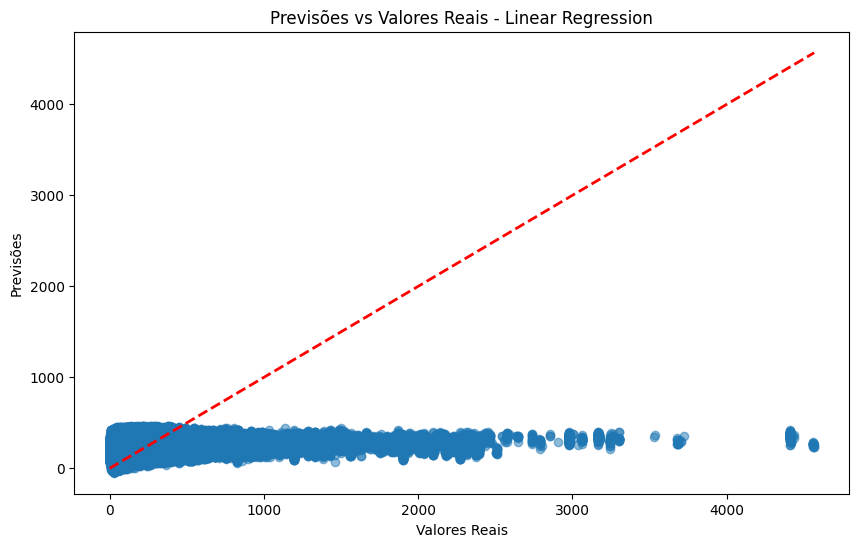

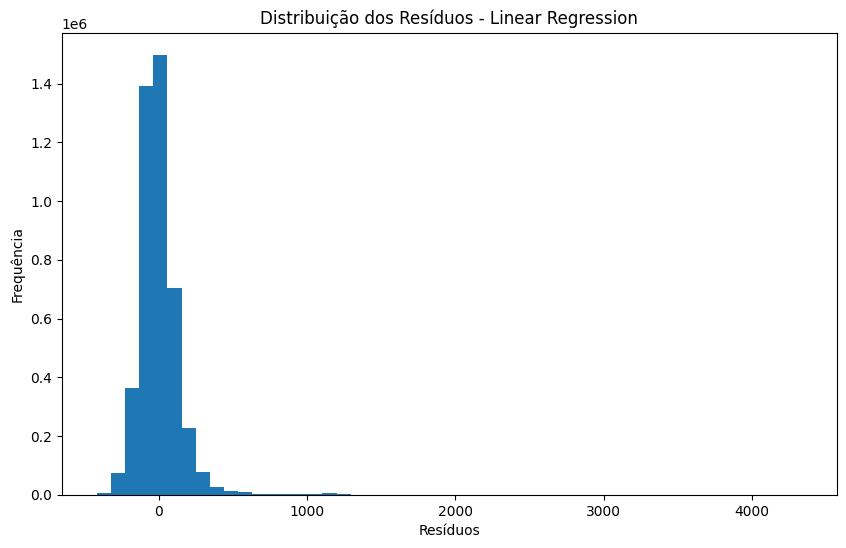

--- Processing Model: Random Forest ---
[11:58:49] Starting training for Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 61.3min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X_train = np.load('/content/drive/MyDrive/ProjetoIA/X_train.npy')
X_test = np.load('/content/drive/MyDrive/ProjetoIA/X_test.npy')
y_train = np.load('/content/drive/MyDrive/ProjetoIA/y_train.npy')
y_test = np.load('/content/drive/MyDrive/ProjetoIA/y_test.npy')


feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        verbose=2  
    ),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=100,
        random_state=42,
        tree_method='gpu_hist',  
        gpu_id=0,                
        predictor='gpu_predictor',  
        verbosity=2              
    )
}


results = {}


for name, model in models.items():
    print(f"--- Processing Model: {name} ---")
    trainer = ModelTrainer(name)
    metrics, predictions = trainer.train_and_evaluate(model, X_train, X_test, y_train, y_test)
    results[name] = {
        'metrics': metrics,
        'predictions': predictions,
        'trainer': trainer
    }

    
    trainer.plot_feature_importance(feature_names)  
    trainer.plot_predictions_vs_actual(y_test)
    trainer.plot_residuals(y_test)


metrics_comparison = pd.DataFrame({
    name: {
        'MAE': results[name]['metrics']['mae'][-1],
        'MSE': results[name]['metrics']['mse'][-1],
        'RMSE': results[name]['metrics']['rmse'][-1],
        'R²': results[name]['metrics']['r2'][-1]
    } for name in models.keys()
}).T

print("\nComparação de Métricas entre Modelos:")
print(metrics_comparison)


plt.figure(figsize=(12, 6))
metrics_comparison[['MAE', 'RMSE']].plot(kind='bar')
plt.title('Comparação de MAE e RMSE entre Modelos')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()